<a href="https://colab.research.google.com/github/GongsonChan/code/blob/main/%EC%9C%84%ED%95%B4%EC%A0%95%EB%B3%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9_%EC%95%84%EC%9D%B4%EB%94%94%EC%96%B4_%EA%B3%B5%EB%AA%A8%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pprint

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# 문자형 데이터 전처리 - 공백 분할,괄호 제거
import re

def remove_trash(df): # n은 글자수 제한
    # 괄호 제거 및 공백 제거를 하나의 apply 함수에서 처리
    df = df.apply(lambda x: re.sub(r'\([^)]*\)', '', str(x)))  # () 제거
    df = df.apply(lambda x: re.sub(r'\[[^\]]*\]', '', str(x)))# [] 제거
    df = df.apply(lambda x: re.sub(r'\<[^>]*\>', '', str(x))) # <> 제거
    df = df.apply(lambda x: re.sub(r'\{[^}]*\}', '', str(x)))  # {} 제거

    # 문자열을 공백 기준으로 분할 후 다시 문자열로 조합
    df = df.apply(lambda x: ' '.join(str(x).split()))

    return df

In [ ]:
# 빈도수 확인
from collections import Counter

def ob_freq(df):
    # 모든 행의 분할된 리스트를 하나로 합치기
    all_words = sum(df.tolist(), [])

    # 단어의 빈도 계산
    word_counts = Counter(all_words)

    # 결과 출력
    print(word_counts)

In [ ]:
def accident_location(df):
  df = df.drop(columns = ['MOTOCY_CNT', 'CYCLE_CNT', 'WALK_CNT', 'DRK'])

  # 마지막 행 제거 - 합계 변수
  df = df.drop(df.index[-1])

  # 문자형 데이터 전처리
  df['지점명'] = remove_trash(df['지점명'])

  df['사고다발'] = np.where(df['발생건수'] >= 4, True, False)
  many_accident = df[df['사고다발'] == True]
  many_accident = many_accident.reset_index()
  many_accident = many_accident.drop(columns = ['index', '사망자수', '사고다발'])

  df['사망자수'] = np.where(df['사망자수'] == 0, None, df['사망자수'])
  df_death = df[['지점명', '발생건수', '사망자수']].dropna()
  df_death['사고다발'] = np.where(df_death['발생건수'] >= 3, True, False)
  many_accident_death = df_death[df_death['사고다발'] == True].drop(columns = ['사망자수', '사고다발'])
  many_accident_death = many_accident_death.reset_index().drop(columns = ['index'])

  df_concat = pd.concat([many_accident, many_accident_death])
  location_list = df_concat['지점명'].unique()

  return location_list

In [ ]:
## 패키지
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from matplotlib.dates import DateFormatter, MonthLocator

##글꼴설정
!pip install --upgrade matplotlib
# 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
fontpath = '/content/drive/MyDrive/소득예측/NanumGothic.ttf'

# 나눔고딕 폰트로 설정
font = fm.FontProperties(fname=fontpath, size=10)

# 한글 폰트 설정
from matplotlib import font_manager, rc
plt.rc('font', family='NanumGothic')

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로
font_path = '/content/drive/MyDrive/소득예측/NanumGothic.ttf'

# 폰트 속성 설정
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 중에서 이름 확인
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

# 폰트 이름을 사용하여 전역 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf /root/.cache/matplotlib/

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  # 또는 NanumGothic 등 설치한 폰트명 사용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

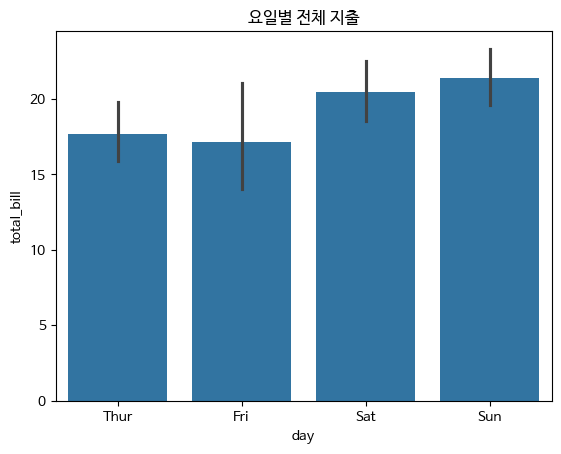

In [ ]:
import seaborn as sns

# 테스트 데이터
tips = sns.load_dataset("tips")

# 한글이 포함된 그래프
sns.barplot(x="day", y="total_bill", data=tips)
plt.title('요일별 전체 지출')
plt.show()

In [ ]:
import matplotlib.font_manager as font_manager

fonts = [f.name for f in font_manager.fontManager.ttflist if 'Nanum' in f.name]
print(fonts)


['NanumGothic Eco', 'NanumBarunGothic', 'NanumSquare_ac', 'NanumMyeongjo', 'NanumBarunpen', 'NanumMyeongjo', 'NanumGothic', 'NanumGothic', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumSquare_ac', 'NanumGothicCoding', 'NanumGothic Eco', 'NanumMyeongjo', 'NanumMyeongjo Eco', 'NanumSquare_ac', 'Nanum Brush Script', 'NanumSquareRound', 'NanumBarunGothic YetHangul', 'NanumBarunGothic', 'NanumSquare', 'NanumMyeongjo YetHangul', 'NanumGothic', 'NanumSquare', 'NanumSquareRound', 'NanumGothic', 'NanumGothic Eco', 'NanumSquareRound', 'NanumMyeongjo Eco', 'NanumBarunpen', 'NanumSquare_ac', 'NanumMyeongjo Eco', 'Nanum Pen Script', 'NanumSquareRound', 'NanumGothic Eco', 'NanumSquare', 'NanumBarunGothic', 'NanumSquare', 'NanumGothicCoding']


In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/소득예측/교통약자다발지점_2022.xls")
df2 = pd.read_excel("/content/drive/MyDrive/소득예측/교통약자다발지점_2021.xls")
df3 = pd.read_excel("/content/drive/MyDrive/소득예측/교통약자다발지점_2020.xls")

In [ ]:
df1 = df1.drop(df1.index[-1])
df2 = df2.drop(df2.index[-1])
df3 = df3.drop(df3.index[-1])

df = pd.concat([df1, df2, df3])

In [ ]:
location_20 = accident_location(df3)
location_21 = accident_location(df2)
location_22 = accident_location(df1)

location_20 = location_20.tolist()
location_21 = location_21.tolist()
location_22 = location_22.tolist()

In [ ]:
from collections import Counter

# 리스트를 결합
combined_list = location_20 + location_21 + location_22

# 각 요소의 출현 횟수를 세기
element_count = Counter(combined_list)

# 2번 이상 나타나는 요소 찾기
common_elements = [element for element, count in element_count.items() if count >= 2]

print(common_elements)

['삼성교사거리', '삼성골든빌아파트 앞 삼거리', '길동 사거리', '광진교 남단', '개신대학원대학교 앞 사거리', '강북구청 사거리', '광산사거리', '번동사거리', '보람쉬움아파트', '김포공항입구 사거리', '당곡지구대 교차로', '현대아파트 앞', '신정교 사거리', '가산동우체국 사거리', '대림역 5번출구 앞 삼거리', '녹천교 동단 사거리', '태릉입구역 사거리', '롯데백화점 앞 사거리', '창동교 동단 사거리', '동부아파트 삼거리', '공릉역 사거리', '산악자전거마을 앞', '이화교 삼거리', '용두1치안센터 사거리', '배봉초 사거리', '클래식타워 앞 교차로', '경동시장사거리', '휘경센트레빌 사거리', '청계9가', '동대문구청 부근 삼거리', '대림사거리', '총신대입구역사거리', '동작역 9번출구 건너편 자전거도로 상', '한강대교 남단 사거리', '삼거리시장 사거리', '망원2치안센터 부근', '망원우체국 앞 사거리', '반포대교 남단 사거리', '용마사거리', '성수1치안센터', '서울숲푸르지오 앞', '삼전동주민센터 사거리', '배명고 동쪽 삼거리', '한강자전거도로', '서울지방경찰청 제3기동단', '잠실2동우체국 앞 삼거리', '삼성 SDS타워서관 앞 교차로', '가락119안전센터 앞 사거리', '광평교 동단 사거리', '방이사거리', '송파세무서 앞 오거리', '올림픽공원북2문', '올림픽공원앞사거리', '잠실레이크팰리스', '한강자전거도로 자전거도로', '영등포시장사거리', '오목교', '구로제2교 동단', '서울특별시 영등포구 문래동6가 52 자전거도로', '마포대교 서단 교차로', '자전거도로', '한강시민자전거도로', '국민건강보험공단', '양화대교 남단', '신대림한솔솔파크 부근', '영등포전화국', '삼성화재영등포사옥 앞', '반포대교 북단 I.C', '역말사거리', '역촌초 사거리', '면목2동사거리', '동1로지하차도', '아남리치카운티 부근', '중랑전화국', '동구햇살아파트 앞', '중화한신아파트

In [ ]:
# 칼럼 제거

df = df.drop(columns = ['MOTOCY_CNT', 'CYCLE_CNT', 'WALK_CNT', 'DRK'])

# 문자형 데이터 전처리
df['지점명'] = remove_trash(df['지점명'])

df['장소'] = df['기초'] + ' ' + df['지점명']

df

,기초,지점명,발생건수,사망자수,장소
0,강남구,동부간선도로 밑 탄천 자전거도로 자전거 도로,4,0,강남구 동부간선도로 밑 탄천 자전거도로 자전거 도로
1,강남구,못곳마을입구,5,0,강남구 못곳마을입구
2,강남구,동호대교 남단,4,0,강남구 동호대교 남단
3,강남구,신청담나들목 부근 화장실 앞,4,0,강남구 신청담나들목 부근 화장실 앞
4,강남구,탄천 자전거 도로 탄천2교에서 성남방향,2,0,강남구 탄천 자전거 도로 탄천2교에서 성남방향
...,...,...,...,...,...
677,중랑구,면목동원베네스트 앞,3,0,중랑구 면목동원베네스트 앞
678,중랑구,목골지구대 부근,3,0,중랑구 목골지구대 부근
679,중랑구,장안시장 부근,3,0,중랑구 장안시장 부근
680,중랑구,메가박스 상봉점 앞,3,0,중랑구 메가박스 상봉점 앞


In [ ]:
df = df.reset_index().drop(columns = ['index'])

df = df.groupby('장소').agg({'발생건수': 'sum',
                            '사망자수': 'sum'}).reset_index()

df

,장소,발생건수,사망자수
0,강남구 PMK빌딩 앞,4,0
1,강남구 nan,2,0
2,강남구 강남경찰서 앞 사거리,2,0
3,강남구 강남역 앞 사거리,5,0
4,강남구 개포현대우편취급국 부근,3,0
...,...,...,...
1159,중랑구 중화동우체국 부근,3,0
1160,중랑구 중화역 부근,11,0
1161,중랑구 중화역 사거리,8,0
1162,중랑구 중화한신아파트 부근 삼거리,8,0


In [ ]:
# 공백 기준으로 분할하기

df_plot_list = df['장소'].apply(lambda x: x.split())

# 빈도수 확인

ob_freq(df_plot_list)

Counter({'앞': 317, '사거리': 304, '삼거리': 164, '부근': 155, '강동구': 70, '교차로': 69, '서울특별시': 68, '강서구': 66, '강남구': 65, '자전거도로': 65, '서초구': 65, '송파구': 64, '마포구': 59, '영등포구': 58, '양천구': 55, '광진구': 54, '노원구': 51, '동대문구': 51, '성동구': 51, '구로구': 50, '동작구': 49, '은평구': 47, '도봉구': 45, '서대문구': 45, '성북구': 42, '중랑구': 42, '강북구': 40, '관악구': 40, '금천구': 35, '도로': 31, '종로구': 31, '용산구': 29, '중구': 29, '남단': 24, '자전거': 21, '한강공원': 18, '북단': 17, '동단': 16, '서단': 14, '노상': 13, '한강자전거도로': 11, 'nan': 9, '횡단보도': 8, '천호동': 7, '잠수교': 7, '한강': 6, '한강시민공원': 6, '동쪽': 6, '입구': 5, '탄천': 5, '암사동': 5, '남쪽': 5, '내': 5, '자전거도': 5, '서쪽': 5, '옆': 5, '중랑천': 5, '정문': 4, '밑': 4, '자전거도로상': 4, '오거리': 4, '자양동': 4, '주차장': 4, '한강대교': 4, '반포동': 4, '여의서로': 4, '미니스톱': 3, '아래': 3, '청담동': 3, '성수대교': 3, '자전거전용도로': 3, '아파트': 3, '교각': 3, '351-1': 3, '수영장': 3, '483-8': 3, '전용도로': 3, '롯데백화점': 3, '마곡역': 3, '발산역': 3, '한강자전거': 3, '잠실대교': 3, '도로상': 3, '반포대교': 3, '잠원로': 3, '221-124': 3, '북단방향': 3, '청계천': 3, '오목교': 3, '합수부': 3, '역촌역': 3, '경남아파트': 2, '광평교'

In [ ]:
# 사거리, 삼거리, 교차로, 기타 로 나누기
df['분류'] = np.where(df['장소'].str.contains('사거리|4거리|교차로'), '사거리',
                    np.where(df['장소'].str.contains('삼거리|3거리'), '삼거리',
                            np.where(df['장소'].str.contains('자전거도로|자전거'), '자전거도로', '그외')))

df

,장소,발생건수,사망자수,분류
0,강남구 PMK빌딩 앞,4,0,그외
1,강남구 nan,2,0,그외
2,강남구 강남경찰서 앞 사거리,2,0,사거리
3,강남구 강남역 앞 사거리,5,0,사거리
4,강남구 개포현대우편취급국 부근,3,0,그외
...,...,...,...,...
1159,중랑구 중화동우체국 부근,3,0,그외
1160,중랑구 중화역 부근,11,0,그외
1161,중랑구 중화역 사거리,8,0,사거리
1162,중랑구 중화한신아파트 부근 삼거리,8,0,삼거리


In [ ]:
# 사고 4건 이상 나누고 오름차순 정렬

df['사고다발'] = np.where(df['발생건수'] >= 4, True, False)

many_accident = df[df['사고다발'] == True].drop(columns = ['분류'])

many_accident = many_accident.reset_index()

many_accident = many_accident.drop(columns = ['index', '사망자수', '사고다발'])

many_accident = many_accident.sort_values(by = '발생건수', ascending = False)

many_accident = many_accident.reset_index().drop(columns = ['index'])

#many_accident

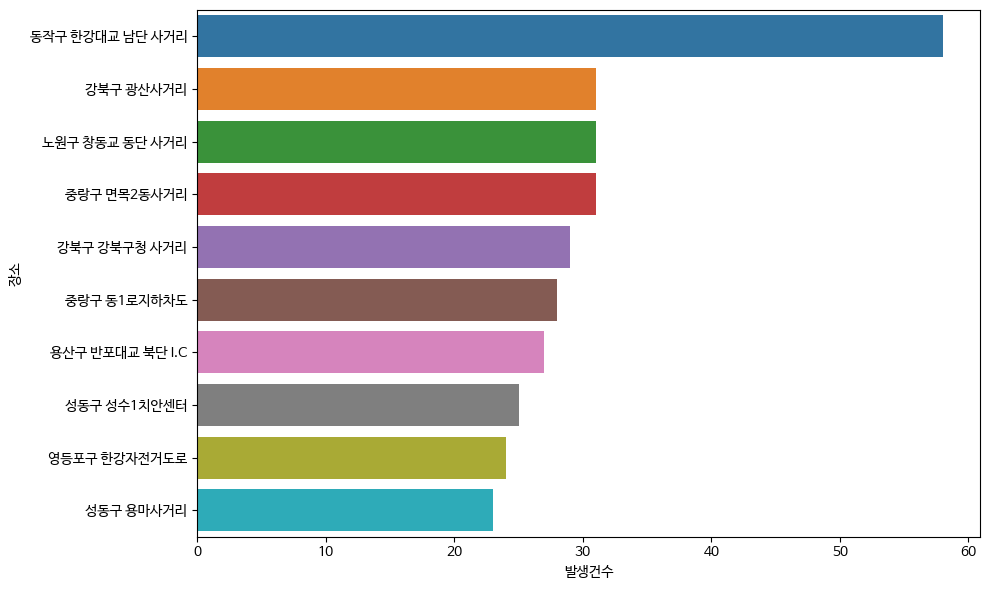

In [ ]:
# 사고다발 지역 top 10 - 그래프로 표시
many_accident_10 = many_accident.head(10)

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(many_accident_10, x="발생건수", y="장소", orient="y",  hue="장소")

plt.tight_layout()  # 레이아웃 자동 조정

# 그래프를 이미지 파일로 저장
plt.savefig('/content/drive/MyDrive/소득예측/사고다발지역10.png', dpi=300)  # dpi는 이미지의 해상도를 지정

In [ ]:
# 사망 발생 지점 top 10

df['사망자수'] = np.where(df['사망자수'] == 0, None, df['사망자수'])

df_death = df[['장소', '발생건수', '사망자수']].dropna()

df_death_10 = df_death.sort_values(by = '사망자수', ascending = False).reset_index().drop(columns = ['index']).head(10)

df_death_10

,장소,발생건수,사망자수
0,중랑구 봉화환승주차장교차로,9,3
1,강동구 천호동성당 사거리,16,3
2,성동구 성수1치안센터,25,3
3,도봉구 동부센트레빌 사거리,14,3
4,노원구 중계역사거리,10,2
5,은평구 서부병원 앞 사거리,4,2
6,은평구 구산역 사거리,16,2
7,영등포구 영등포로타리,10,2
8,송파구 탄천교 동단 교차로,7,2
9,송파구 레이크호텔 앞 삼거리,7,2


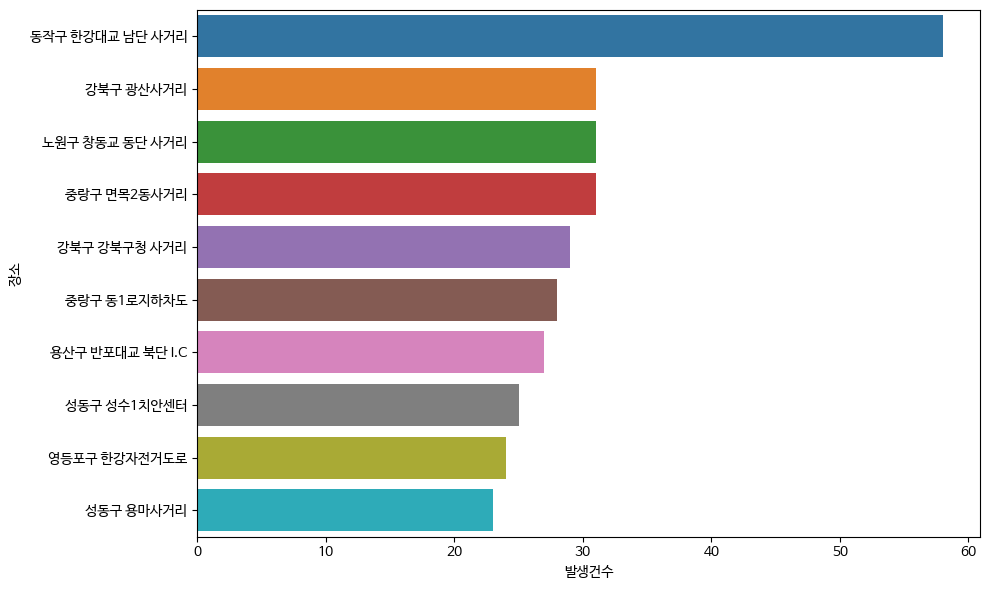

In [ ]:
# 사망 발생 지역 top 10 그래프로 표시
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(many_accident_10, x="발생건수", y="장소", orient="y",  hue="장소")

plt.tight_layout()  # 레이아웃 자동 조정
# 그래프를 이미지 파일로 저장
plt.savefig('/content/drive/MyDrive/소득예측/사망발생지역10.png', dpi=300)  # dpi는 이미지의 해상도를 지정

In [ ]:
# 사망 발생 지점 중 사건 발생건수 3개 이상

df_death['사고다발'] = np.where(df_death['발생건수'] >= 3, True, False)

many_accident_death = df_death[df_death['사고다발'] == True].drop(columns = ['사고다발'])

many_accident_death = many_accident_death.reset_index().drop(columns = ['index'])

many_accident_death

,장소,발생건수,사망자수
0,강동구 광진교 남단,17,1
1,강동구 천호3동주민센터 앞 삼거리,4,2
2,강동구 천호동성당 사거리,16,3
3,강북구 수유3동우체국 앞 삼거리,8,2
4,강북구 요진아파트 사거리,4,2
5,강서구 서남물재생센터 정문,3,1
6,강서구 송정역 사거리,7,2
7,강서구 화원중 사거리,4,2
8,관악구 신사동주민센터입구,4,1
9,구로구 구로4동우체국 사거리,4,2


In [ ]:
# 사고 다발 지역 list

df_concat = pd.concat([many_accident, many_accident_death])

location_list = df_concat['장소'].unique()

location_list

array(['동작구 한강대교 남단 사거리', '강북구 광산사거리', '노원구 창동교 동단 사거리', '중랑구 면목2동사거리',
       '강북구 강북구청 사거리', '중랑구 동1로지하차도', '용산구 반포대교 북단 I.C', '성동구 성수1치안센터',
       '영등포구 한강자전거도로', '성동구 용마사거리', '동작구 동작역 9번출구 건너편 자전거도로 상',
       '동대문구 휘경센트레빌 사거리', '영등포구 영등포시장사거리', '강동구 길동 사거리', '강북구 번동사거리',
       '송파구 삼전동주민센터 사거리', '송파구 배명고 동쪽 삼거리', '성동구 서울숲푸르지오 앞',
       '성북구 신동아파밀리에 부근', '강북구 개신대학원대학교 앞 사거리', '동작구 총신대입구역사거리',
       '동작구 삼거리시장 사거리', '은평구 응암역 부근 사거리', '영등포구 양화한강공원 자전거도로 잠실방향',
       '송파구 올림픽공원앞사거리', '영등포구 오목교', '노원구 롯데백화점 앞 사거리',
       '영등포구 한강자전거도로 자전거도로', '영등포구 구로제2교 동단', '서초구 반포대교 남단 사거리',
       '마포구 망원2치안센터 부근', '영등포구 양화대교 남단', '동대문구 용두두산위브 앞', '강동구 광진교 남단',
       '노원구 순복음노원교회 앞 삼거리', '동작구 대림사거리', '은평구 구산역 사거리', '종로구 광하문우체국 사거리',
       '송파구 둔촌사거리', '강동구 천호동성당 사거리', '은평구 역말사거리', '송파구 잠실레이크팰리스',
       '관악구 당곡사거리', '강남구 삼성골든빌아파트 앞 삼거리', '송파구 한강자전거도로', '중랑구 중랑전화국',
       '노원구 상계교 동단 사거리', '강북구 미아역 사거리', '노원구 태릉입구역 사거리',
       '송파구 서울잠실우체국 동쪽 삼거리', '영등포구 신대림한솔솔파크 부근', '중랑구 중량소방서교차로',
     

In [ ]:
# 사망사고 발생지역 list

location_list_death = df_death['장소'].unique()

location_list_death

array(['강남구 성수대교 남단 사거리', '강남구 수서역 부근 삼거리', '강동구 광진교 남단',
       '강동구 천호3동주민센터 앞 삼거리', '강동구 천호동성당 사거리', '강동구 천호신사거리',
       '강북구 수유3동우체국 앞 삼거리', '강북구 요진아파트 사거리', '강서구 등촌역 삼거리',
       '강서구 서남물재생센터 정문', '강서구 송정역 사거리', '강서구 프라임팰리스', '강서구 화원중 사거리',
       '관악구 신사동주민센터입구', '관악구 조원동주민센터', '구로구 구로4동우체국 사거리',
       '구로구 구로구청 앞 사거리', '구로구 오류동우체국 앞 삼거리', '노원구 중계역사거리',
       '도봉구 동부센트레빌 사거리', '도봉구 창동고 앞 삼거리', '동대문구 답십리골든타워 앞 사거리',
       '동대문구 답십리역', '동대문구 앞 도로 홈플러스동대문점 주차장 출입구 앞', '동대문구 이슬어린이공원 부근 삼거리',
       '동대문구 종이접기협회', '동대문구 한국외국어대 앞 사거리', '동대문구 휘경2동주민센터 앞 삼거리',
       '마포구 동교동삼거리', '마포구 아현교차로', '서대문구 홍연2교 북단 교차로', '서대문구 홍제초 사거리',
       '서초구 언남주유소 앞 교차로', '성동구 서울숲지구대 사거리', '성동구 성수1치안센터', '성동구 월드특수조명',
       '성동구 한강 자전거도로 뚝섬공원 2-54앞', '성북구 장곡초 사거리', '성북구 장위동 74-304번지',
       '송파구 레이크호텔 앞 삼거리', '송파구 방이2동주민센터 앞 사거리', '송파구 송파초 서쪽 삼거리',
       '송파구 잠실대교 남단 교차로', '송파구 탄천교 동단 교차로', '양천구 목동신시가지10단지 앞',
       '양천구 신월IC', '양천구 신정네거리역 사거리', '양천구 청송그린힐 아파트 앞 사거리', '영등포구 썬프라자',
       '영등포구 영등포

In [ ]:
# 분류별 사건 발생건수 사망자수

result_df = df.groupby('분류').agg({'발생건수': 'sum',
                                 '사망자수': 'sum'})

result_df = result_df.reset_index()

result_df

,분류,발생건수,사망자수
0,그외,1813,22
1,사거리,3041,48
2,삼거리,851,18
3,자전거도로,642,1


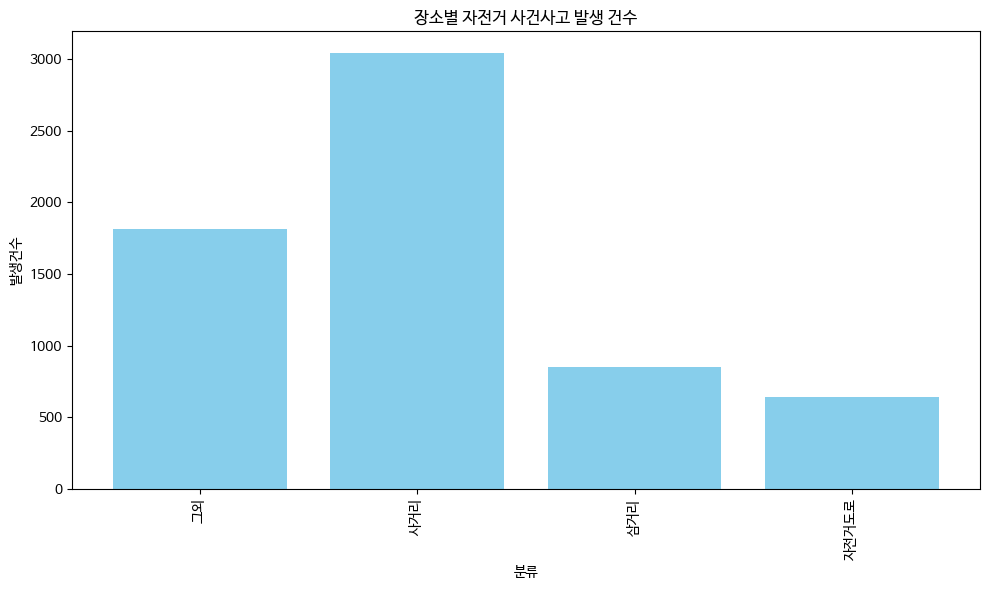

In [ ]:
# 그래프로 나타내기 - 장소 종류별 사고 발생건수
import seaborn as sns

# 차트 생성
plt.figure(figsize=(10, 6))
plt.bar(result_df['분류'], result_df['발생건수'], color='skyblue')
plt.xlabel('분류')
plt.ylabel('발생건수')
plt.title('장소별 자전거 사건사고 발생 건수')
plt.xticks(rotation=90)
plt.tight_layout()

# 그래프를 이미지 파일로 저장
plt.savefig('/content/drive/MyDrive/소득예측/장소별자전거사건사고발생건수.png', dpi=300)  # dpi는 이미지의 해상도를 지정
plt.show()



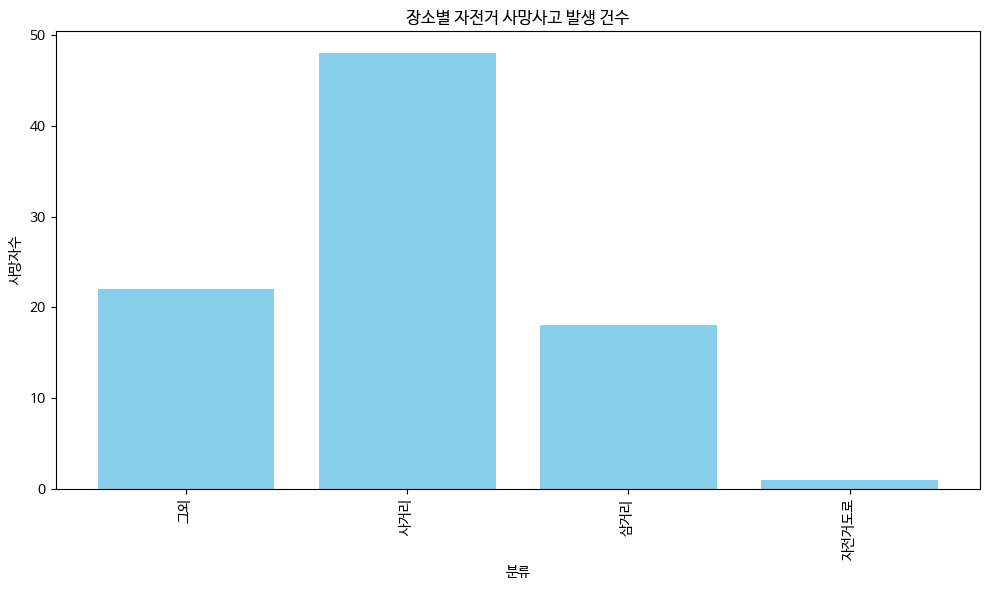

In [ ]:
# 그래프로 나타내기 - 장소 종류별 사망 발생건수

# 차트 생성
plt.figure(figsize=(10, 6))
plt.bar(result_df['분류'], result_df['사망자수'], color='skyblue')
plt.xlabel('분류')
plt.ylabel('사망자수')
plt.title('장소별 자전거 사망사고 발생 건수')
plt.xticks(rotation=90)
plt.tight_layout()


# 그래프를 이미지 파일로 저장
plt.savefig('/content/drive/MyDrive/소득예측/장소별자전거사망사고발생건수.png', dpi=300)  # dpi는 이미지의 해상도를 지정
plt.show()
